# Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

## The advantages of support vector machines are:

##### Effective in high dimensional spaces.

##### Still effective in cases where number of dimensions is greater than the number of samples.

##### Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

##### Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

## The disadvantages of support vector machines include:

##### If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

##### SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).




# Methodology

1. Import the libraries.
2. Read the data as Dataframe.
3. Analyze Data its columns, type, rows, etc.
4. Visualizing Data
5. Feature Selection.
6. Splitting into label and features and then into training and testing data.
7. Train SVM model using Training Data.
8. Predicting data set, checking accuracy of the model trained.

## Importing Libraries

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
%matplotlib inline

## Reading Data from excel file

In [101]:
Data = pd.read_excel('C:\\Users\\nabhr\\Cognitive_Lab\\SVM\\voice.xlsx')

## Analyzing Data

In [90]:
Data.shape

(3168, 21)

In [91]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [92]:
Data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Since data does not require pre processing, lets move on to feature selection

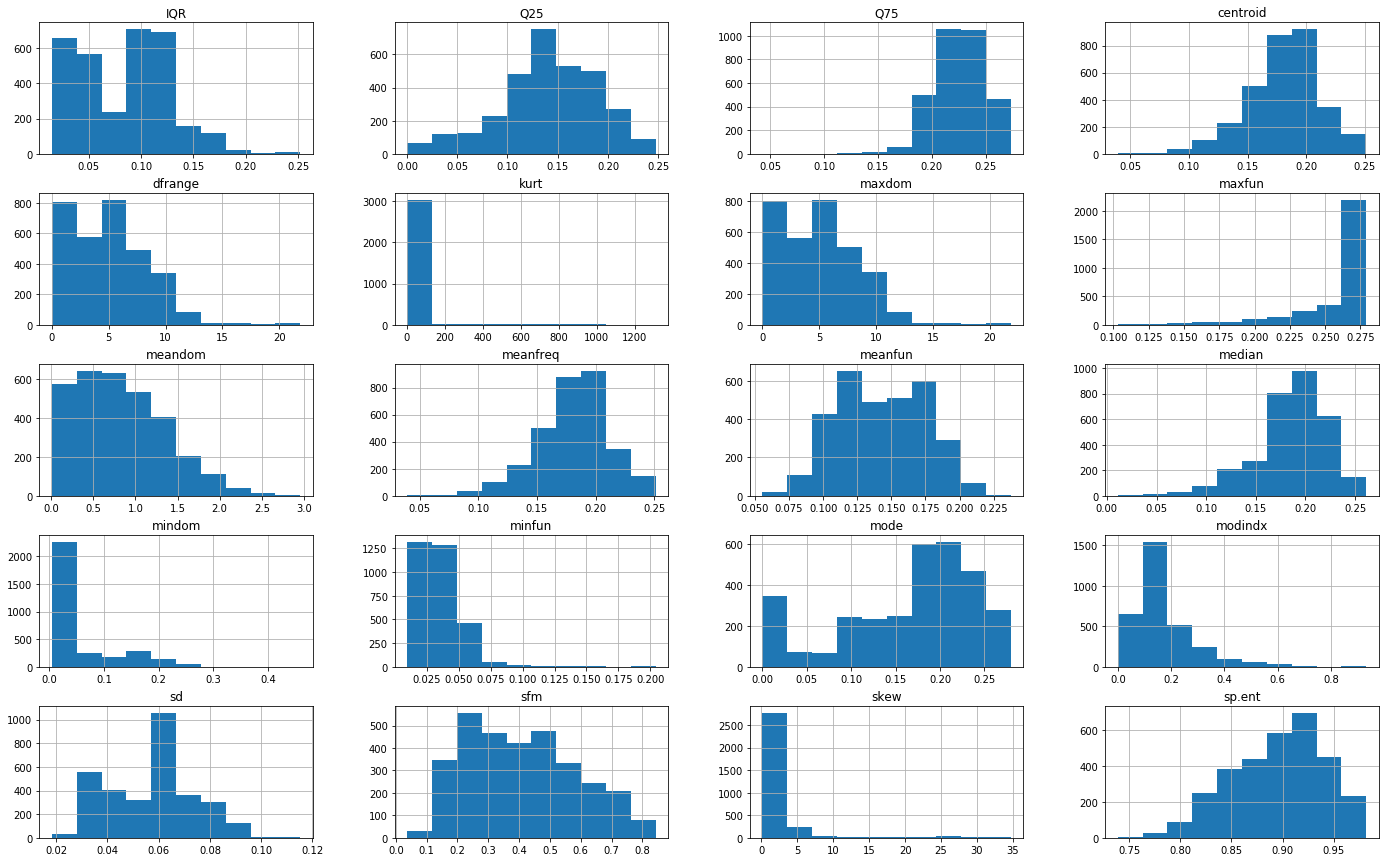

In [93]:
Data.hist(figsize = (24,15))
plt.show()

## 'kurt' is the only feature that has only one value in more than 90% of the examples. Drop columns with such property

In [94]:
DataN = Data.drop('kurt', axis = 1)
DataN.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


# We now have data ready to give to our support vector machine

# Splitting Feature and label

In [95]:
X = DataN.drop('label', axis = 1)
Y = Data.loc[:,'label']

## Splitting Testing and Training Data

In [96]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

## Training SVM model and fitting training data into the model

In [97]:
model = svm.LinearSVC()

In [98]:
model.fit(x_train, y_train)

C:\Users\nabhr\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC()

## Predicting the score on the testing data

In [99]:
model.score(x_test, y_test)

0.9631966351209253

# Model yielded accuracy of 96.3% on the testing splitted data.